In [2]:
# BOXPLOTS OBJECTIVE FUNCTIONS
# Overview statistics

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import seaborn as sns
import string
import cartopy
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from pathlib import Path
from glob import glob

In [2]:
# Set Paths
ROOT = Path("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/")
AUXDATA = Path(f"{ROOT}/aux_data")
RESULTS = Path(f"{ROOT}/results/")

In [3]:
wflow_calibrated_uncalibrated_csv = f'{RESULTS}/sampling_uncertainty_overview_wflow_calibrated_uncalibrated.csv'
wflow_calibrated_pcrglob_csv = f'{RESULTS}/sampling_uncertainty_overview_wflow_calibrated_pcr-globwb.csv'

basins_shp = f"{AUXDATA}/CAMELS-GB/data/CAMELS_GB_catchment_boundaries/CAMELS_GB_catchment_boundaries.shp"

In [4]:
df_wflow_calibrated_uncalibrated = pd.read_csv(wflow_calibrated_uncalibrated_csv, index_col='basin_id')
df_calibrated_pcrglob = pd.read_csv(wflow_calibrated_pcrglob_csv, index_col='basin_id')

In [5]:
# Construct single dataframe
tolerance_intervals = []
objective_differences = []
objective_functions = []

df = pd.DataFrame()

for index, row in df_wflow_calibrated_uncalibrated.iterrows():
    objective_functions.append('KGE-NP')
    tolerance_intervals.append(row.kge_average_tolerance)
    objective_differences.append(row.kge_difference)
    
    objective_functions.append('NSE')
    tolerance_intervals.append(row.nse_average_tolerance)
    objective_differences.append(row.nse_difference)

df['objective_function'] = objective_functions
df['average_tolerance_interval'] = tolerance_intervals
df['objective_function_difference'] = objective_differences
df['comparison'] = ['wflow_sbm calibrated - default'] * len(df)


df2 = pd.DataFrame()

tolerance_intervals = []
objective_differences = []
objective_functions = []

for index, row in df_calibrated_pcrglob.iterrows():
    objective_functions.append('KGE-NP')
    tolerance_intervals.append(row.kge_average_tolerance)
    objective_differences.append(row.kge_difference)
    
    objective_functions.append('NSE')
    tolerance_intervals.append(row.nse_average_tolerance)
    objective_differences.append(row.nse_difference)

df2['objective_function'] = objective_functions
df2['average_tolerance_interval'] = tolerance_intervals
df2['objective_function_difference'] = objective_differences
df2['comparison'] = ['wflow_sbm calibrated - PCR-GLOBWB'] * len(df)

df = df.append(df2)

/scratch-local/jaerts.2598960/ipykernel_3833687/3200963016.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


In [6]:
data = {'Model Combination': ['wflow_sbm Calibrated & Uncalibrated', 'wflow_sbm Calibrated & Uncalibrated','wflow_sbm Calibrated & PCR-GLOBWB','wflow_sbm Calibrated & PCR-GLOBWB'],
        'Objective Function': ['KGE-NP', 'NSE','KGE-NP','NSE'],
        'Sampling Uncertainty > Objective Function Difference': [288, 302, 86, 124]}

df_table = pd.DataFrame(data)
df_table = df_table.set_index('Model Combination')

In [7]:
import textwrap

df = df.sort_values(by='comparison')
df = df.sort_values(by='objective_function')

In [8]:
df

objective_function  average_tolerance_interval  \
794             KGE-NP                   12.510582   
600             KGE-NP                    0.140689   
416             KGE-NP                    0.172029   
414             KGE-NP                    0.163813   
602             KGE-NP                    0.281496   
..                 ...                         ...   
571                NSE                    0.298007   
573                NSE                    0.242371   
593                NSE                    0.277180   
425                NSE                   12.901149   
795                NSE                 3786.813170   

     objective_function_difference                         comparison  
794                      14.293814  wflow_sbm calibrated - PCR-GLOBWB  
600                       0.052971     wflow_sbm calibrated - default  
416                       0.281500  wflow_sbm calibrated - PCR-GLOBWB  
414                       0.147443  wflow_sbm calibrated - PCR-GLOBWB  
602                       0.081500     wflow_sbm calibrated - default  
..                             ...                                ...  
571                       0.595514  wflow_sbm calibrated - PCR-GLOBWB  
573                       0.774243  wflow_sbm calibrated - PCR-GLOBWB  
593                       9.682414  wflow_sbm calibrated - PCR-GLOBWB  
425                       0.121843  wflow_sbm calibrated - PCR-GLOBWB  
795                    2227.083771     wflow_sbm calibrated - default  

[1592 rows x 4 columns]

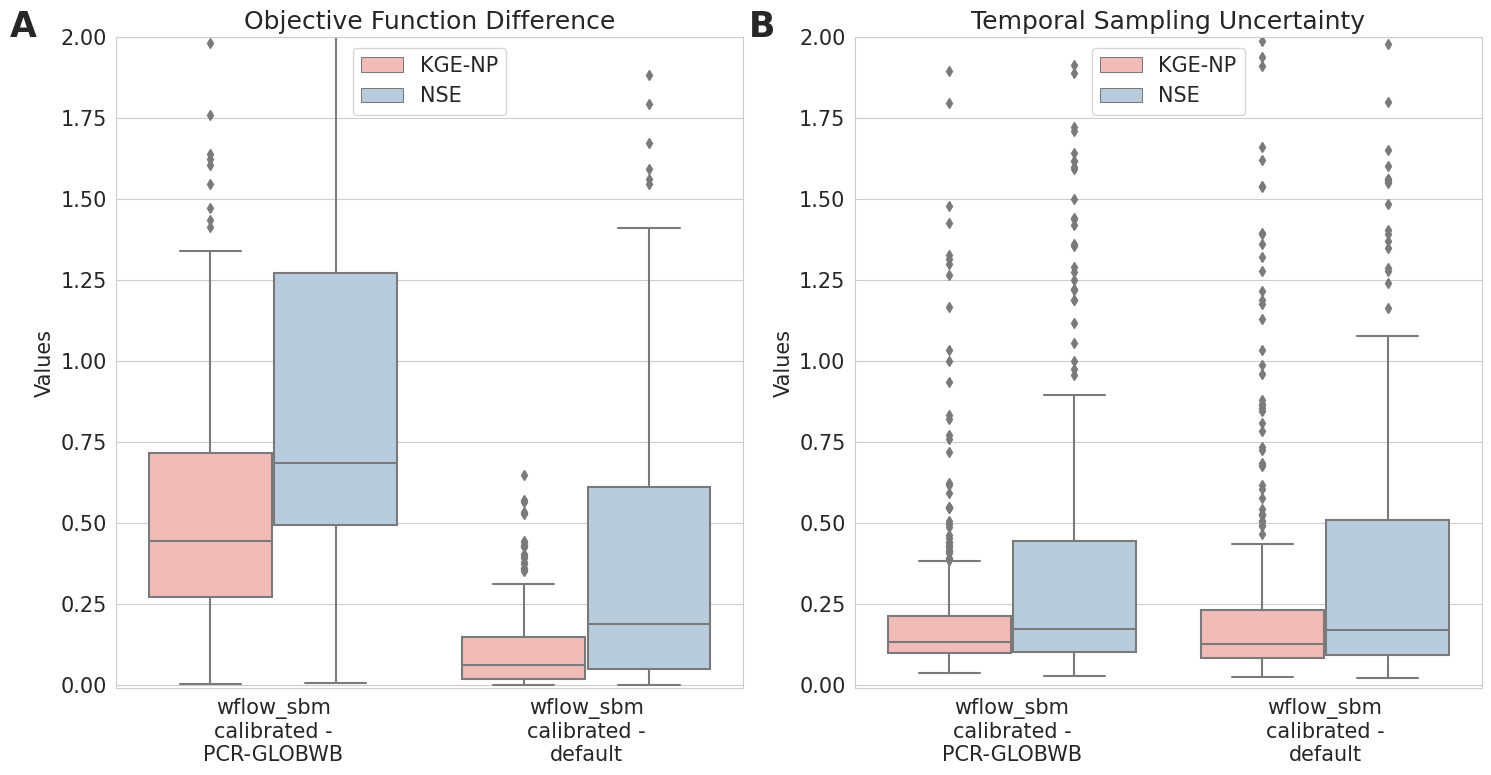

In [9]:
matplotlib.rcParams.update({'font.size': 15})
sns.set_style("whitegrid")
fig, axes = plt.subplots(1,2,figsize=(15, 8))

# Objective function Difference
axes[0] = sns.boxplot(ax=axes[0], data=df, x="comparison", y="objective_function_difference", hue="objective_function", palette="Pastel1")
axes[0].set_ylim(-0.01, 2)

# axes[1] = sns.boxplot(ax=axes[1], data=df, x="comparison", y="objective_function_difference", hue="objective_function", palette="Pastel1")
# axes[1].set_ylim(-0.01, 2)

axes[0].set(xlabel=None) 
axes[0].set_ylabel('Values')
axes[0].set_title('Objective Function Difference')


# axes[1].set(xlabel=None) 
# axes[1].set_ylabel('Values')
# axes[1].set_title('Objective Function Difference')

texts = [t.get_text()  for t in axes[0].get_xticklabels()]
texts = [textwrap.fill(t.get_text(), 15)  for t in axes[0].get_xticklabels()]
axes[0].set_xticklabels([textwrap.fill(t.get_text(), 15)  for t in axes[0].get_xticklabels()])
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=labels)

axes[1] = sns.boxplot(ax=axes[1], data=df, x="comparison", y="average_tolerance_interval", hue="objective_function", palette="Pastel1")
axes[1].set_ylim(-0.01, 2)

axes[1].set(xlabel=None) 
axes[1].set_ylabel('Values')
axes[1].set_title('Temporal Sampling Uncertainty')

texts = [t.get_text()  for t in axes[1].get_xticklabels()]
texts = [textwrap.fill(t.get_text(), 15)  for t in axes[1].get_xticklabels()]
axes[1].set_xticklabels([textwrap.fill(t.get_text(), 15)  for t in axes[1].get_xticklabels()])
handles, labels = axes[0].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels)





# plt.subplots_adjust(left=0.2, bottom=0.4)

# the_table = plt.table(cellText=df_table.values,
#           rowLabels=df_table.index,
#           colLabels=df_table.columns,
#           cellLoc = 'center', rowLoc = 'center',
#           transform=plt.gcf().transFigure,
#           bbox = ([0.375, 0.1, 0.5, 0.2]))
# the_table.auto_set_font_size(False)
# the_table.set_fontsize(9)

axes[0].text(-0.17,1, string.ascii_uppercase[0], transform=axes[0].transAxes, 
            size=25, weight='bold')

axes[1].text(-0.17,1, string.ascii_uppercase[1], transform=axes[1].transAxes, 
            size=25, weight='bold')

# axes[0].text(-0.15,1, string.ascii_uppercase[0], transform=axes[0].transAxes, 
#             size=20, weight='bold')

# plt.text(-3.2, -0.5, string.ascii_uppercase[2], size=20, weight='bold')

# plt.show()
plt.tight_layout()
plt.savefig(f'/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/plots/fig_sampling_uncertainty_boxplots.png', bbox_inches='tight', dpi=300)
plt.show()

